# CNT a smarność

## Import data from file
Files in folder "Smarnosc_csv_all":  
### **PEEK Dural**
- **DCV**  

|40T_19|43T_19|45T_19
|:-:|---|---|
|2019_7_16_12_40_50|2019_7_16_10_55_22|2019_7_16_11_51_55
|2019_7_16_13_15_9|2019_7_16_11_12_41|2019_7_16_12_9_34
|2019_7_16_13_37_3|2019_7_16_11_35_48|2019_7_16_12_24_30

- **DCI**  

|40T_19|43T_19|45T_19|
|:------:|:------:|:------:|
|2019_7_22_11_51_40|2019_7_22_12_12_29|2019_7_22_12_25_56
|2019_7_22_12_37_54|2019_7_22_12_55_8|2019_7_22_13_8_6
|2019_7_22_13_21_29| 


### **PTFE Dural**
- **DCV**  

|40T_19|43T_19|45T_19|
|:------:|:------:|:------:|
|2019_7_17_11_14_24|2019_7_17_11_36_23|2019_7_17_12_11_53
|2019_7_17_11_24_56|2019_7_17_11_47_6|2019_7_17_12_22_56


### **Druk3D Dural**
- **DCV**  

|40T_19|43T_19|45T_19|
|:------:|:------:|:------:|
|2019_7_17_12_36_54|2019_7_17_12_49_52|2019_7_17_13_4_13

### **PEEK Cu**
- **DCV**  

|40T_19|43T_19|45T_19|
|:------:|:------:|:------:|
| ------ |2019_7_22_13_45_35|2019_7_22_14_4_52|



# PEEK Dural DCV 

In [422]:
import pandas as pd # primary data structure library

# getting data
def handle_data(data):
    data.drop(['Item' ,'Unnamed: 3'], axis=1,inplace=True)
    data.rename(columns={"Dmm1_Time(s)(1)(1)": "Time", "Dmm1_DcVoltage(1)(1)": "Voltage"},inplace = True)
    data['Voltage']=data['Voltage']*1000

df_40T = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_12_40_50.csv",delimiter =';',decimal=",")
handle_data(df_40T)

df_40T2 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_15_9.csv",delimiter =';',decimal=",")
handle_data(df_40T2)

df_40T3 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_37_3.csv",delimiter =';',decimal=",")
handle_data(df_40T3)

df_43T = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_10_55_22.csv",delimiter =';',decimal=",")
handle_data(df_43T)

df_45T = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_11_51_55.csv",delimiter =';',decimal=",")
handle_data(df_45T)

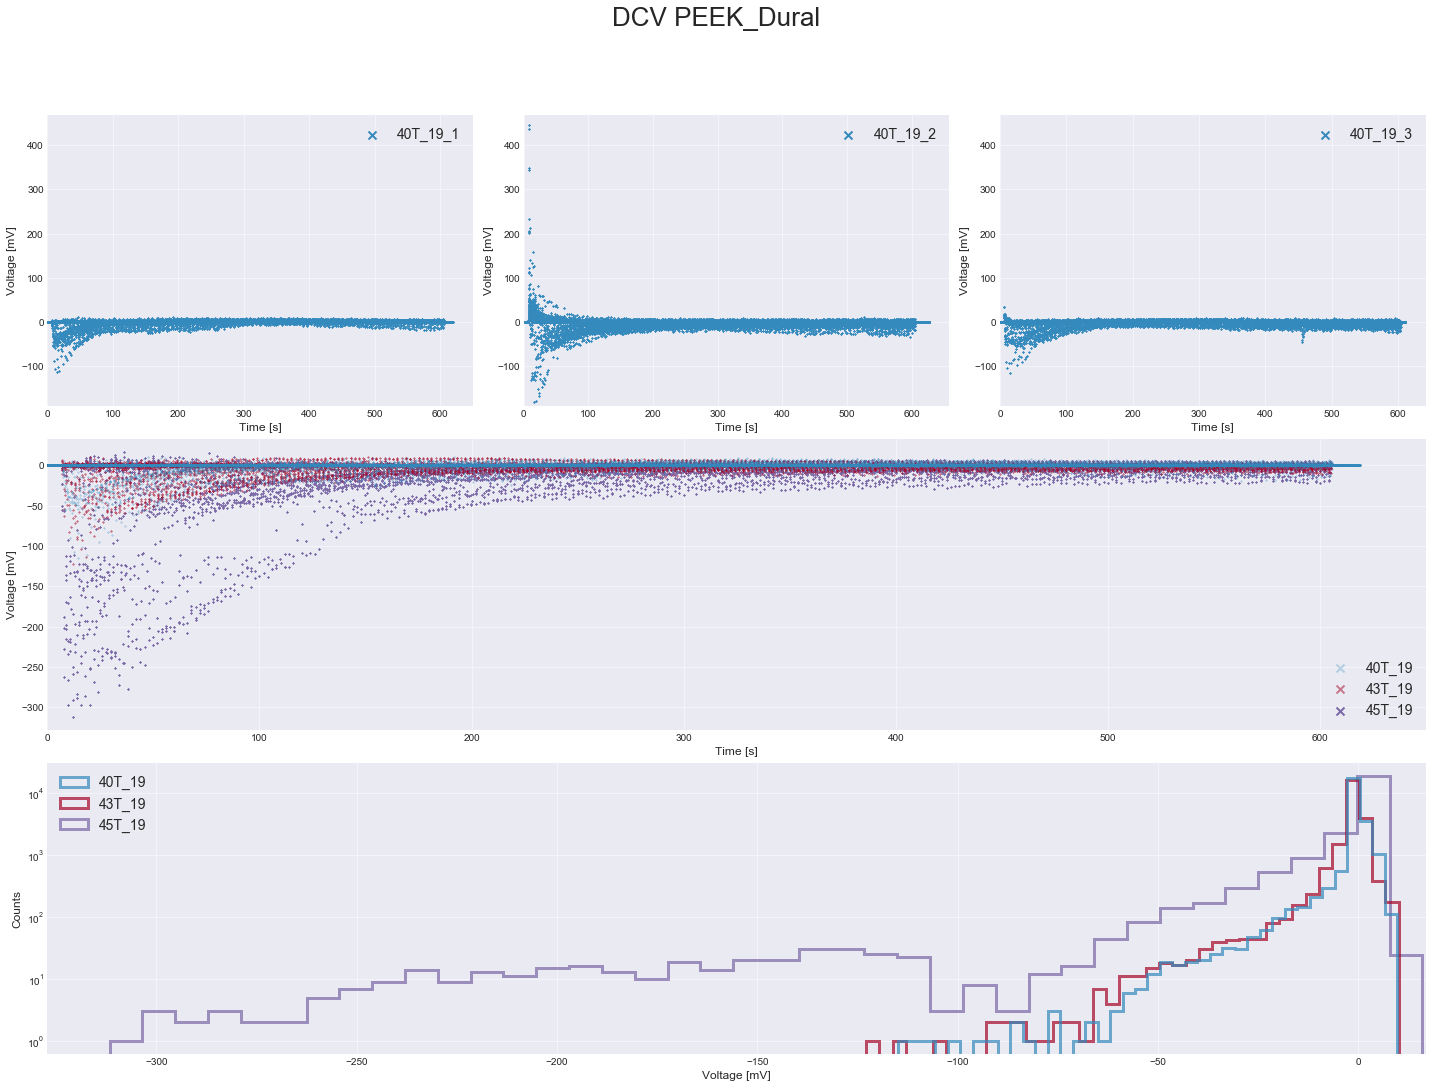

In [423]:
import numpy as np
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn-darkgrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('DCV PEEK_Dural', fontsize=26)


min_y=min(min(df_40T['Voltage']), min(df_40T2['Voltage']), min(df_40T3['Voltage']))*1.05
max_y=max(max(df_40T['Voltage']), max(df_40T2['Voltage']), max(df_40T3['Voltage']))*1.05

def applyPlotStyle(arg):
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.legend(fontsize=14, markerscale=8)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if arg == 1:
        plt.xlim(0, )
        plt.ylim(min_y, max_y)
    else:
        plt.xlim(0, )

ax31 = fig.add_subplot(gs[0,0])
plt.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19_1', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

ax32 = fig.add_subplot(gs[0,1])
plt.scatter(df_40T2['Time'],df_40T2['Voltage'], label='40T_19_2', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

ax33 = fig.add_subplot(gs[0,2])
plt.scatter(df_40T3['Time'],df_40T3['Voltage'], label='40T_19_3', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

mask = dict(marker='x', s=1)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19', **mask, alpha=0.3, zorder=3)
ax1.scatter(df_43T['Time'],df_43T['Voltage'], label='43T_19', **mask, alpha=0.5, zorder=2)
ax1.scatter(df_45T['Time'],df_45T['Voltage'], label='45T_19', **mask, alpha=1.0, zorder=1)
applyPlotStyle(2)

kwargs = dict(histtype="step", alpha=0.7,  bins=40, linewidth=3)
min_hist=min(min(df_40T['Voltage']), min(df_43T['Voltage']), min(df_45T['Voltage']))*1.05
max_hist=max(max(df_40T['Voltage']), max(df_43T['Voltage']), max(df_45T['Voltage']))*1.05

ax2 = fig.add_subplot(gs[2,:])
ax2.hist(df_40T['Voltage'], **kwargs, label = '40T_19', zorder=3)
ax2.hist(df_43T['Voltage'], **kwargs, label = '43T_19', zorder=2)
ax2.hist(df_45T['Voltage'], **kwargs, label = '45T_19', zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend(fontsize=14, markerscale=8)

#plt.savefig("PEEK Dural DCV.png", bbox_inches='tight',dpi=600)

# PEEK Dural DCI 

In [424]:
import pandas as pd # primary data structure library

# getting data
def handle_data(data):
    data.drop(['Item' ,'Unnamed: 3'], axis=1,inplace=True)
    data.rename(columns={"Dmm1_Time(s)(1)(1)": "Time", "Dmm1_DcCurrent(1)(1)": "Current"},inplace = True)
    data['Current']=data['Current']*1000000000

df_40T = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_12_37_54.csv",delimiter =';',decimal=",")
handle_data(df_40T)

df_40T2 = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_13_21_29.csv",delimiter =';',decimal=",")
handle_data(df_40T2)

#df_40T3 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_37_3.csv",delimiter =';',decimal=",")
#handle_data(df_40T3)

df_43T = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_12_12_29.csv",delimiter =';',decimal=",")
handle_data(df_43T)

df_45T = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_12_25_56.csv",delimiter =';',decimal=",")
handle_data(df_45T)

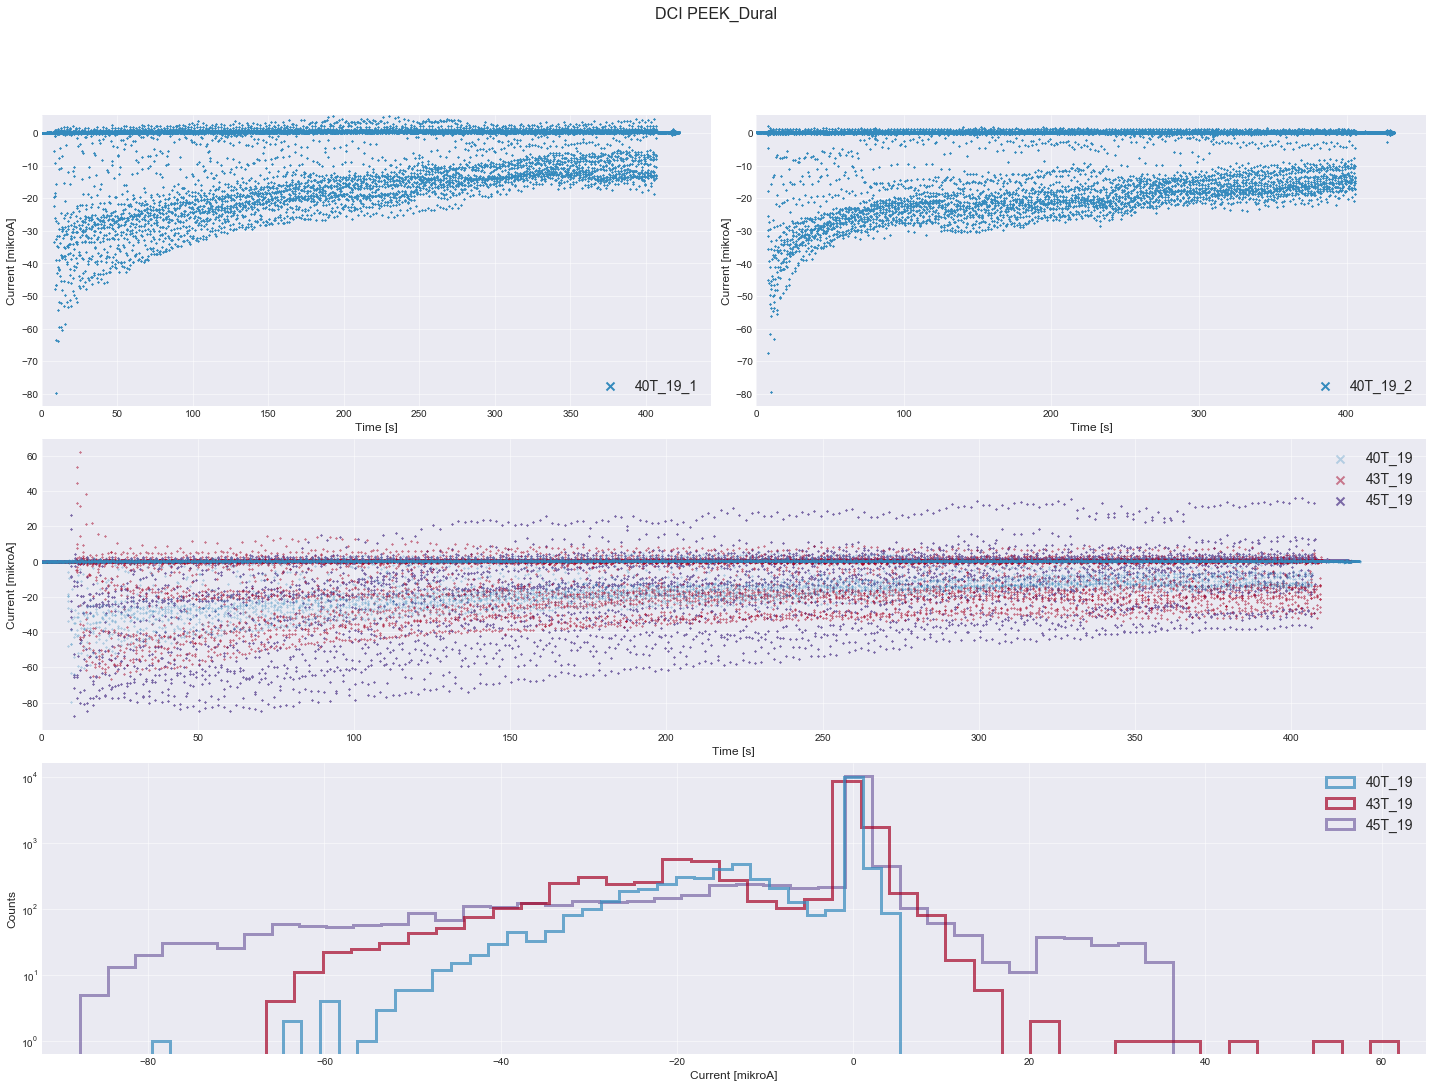

In [425]:
import numpy as np
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn-darkgrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 2)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('DCI PEEK_Dural', fontsize=26)


min_y=min(min(df_40T['Current']), min(df_40T2['Current']))*1.05
max_y=max(max(df_40T['Current']), max(df_40T2['Current']))*1.05

def applyPlotStyle(arg):
    plt.xlabel('Time [s]')
    plt.ylabel('Current [mikroA]')
    plt.legend(fontsize=14, markerscale=8)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if arg == 1:
        plt.xlim(0, )
        plt.ylim(min_y, max_y)
    else:
        plt.xlim(0, )

ax31 = fig.add_subplot(gs[0,0])
plt.scatter(df_40T['Time'],df_40T['Current'], label='40T_19_1', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

ax32 = fig.add_subplot(gs[0,1])
plt.scatter(df_40T2['Time'],df_40T2['Current'], label='40T_19_2', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

mask = dict(marker='x', s=1)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(df_40T['Time'],df_40T['Current'], label='40T_19', **mask, alpha=0.3, zorder=3)
ax1.scatter(df_43T['Time'],df_43T['Current'], label='43T_19', **mask, alpha=0.5, zorder=2)
ax1.scatter(df_45T['Time'],df_45T['Current'], label='45T_19', **mask, alpha=1.0, zorder=1)
applyPlotStyle(2)

kwargs = dict(histtype="step", alpha=0.7,  bins=40, linewidth=3)
min_hist=min(min(df_40T['Current']), min(df_43T['Current']), min(df_45T['Current']))*1.05
max_hist=max(max(df_40T['Current']), max(df_43T['Current']), max(df_45T['Current']))*1.05

ax2 = fig.add_subplot(gs[2,:])
ax2.hist(df_40T['Current'], **kwargs, label = '40T_19', zorder=3)
ax2.hist(df_43T['Current'], **kwargs, label = '43T_19', zorder=2)
ax2.hist(df_45T['Current'], **kwargs, label = '45T_19', zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Current [mikroA]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend(fontsize=14, markerscale=8)

#plt.savefig("PEEK Dural DCI.png", bbox_inches='tight',dpi=600)

# PTFE Dural DCV

In [432]:
import pandas as pd # primary data structure library

# getting data
def handle_data(data):
    data.drop(['Item' ,'Unnamed: 3'], axis=1,inplace=True)
    data.rename(columns={"Dmm1_Time(s)(1)(1)": "Time", "Dmm1_DcVoltage(1)(1)": "Voltage"},inplace = True)
    data['Voltage']=data['Voltage']*1000

df_40T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_11_14_24.csv",delimiter =';',decimal=",")
handle_data(df_40T)

df_40T2 = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_11_24_56.csv",delimiter =';',decimal=",")
handle_data(df_40T2)

#df_40T3 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_37_3.csv",delimiter =';',decimal=",")
#handle_data(df_40T3)

df_43T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_11_36_23.csv",delimiter =';',decimal=",")
handle_data(df_43T)

df_45T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_12_11_53.csv",delimiter =';',decimal=",")
handle_data(df_45T)

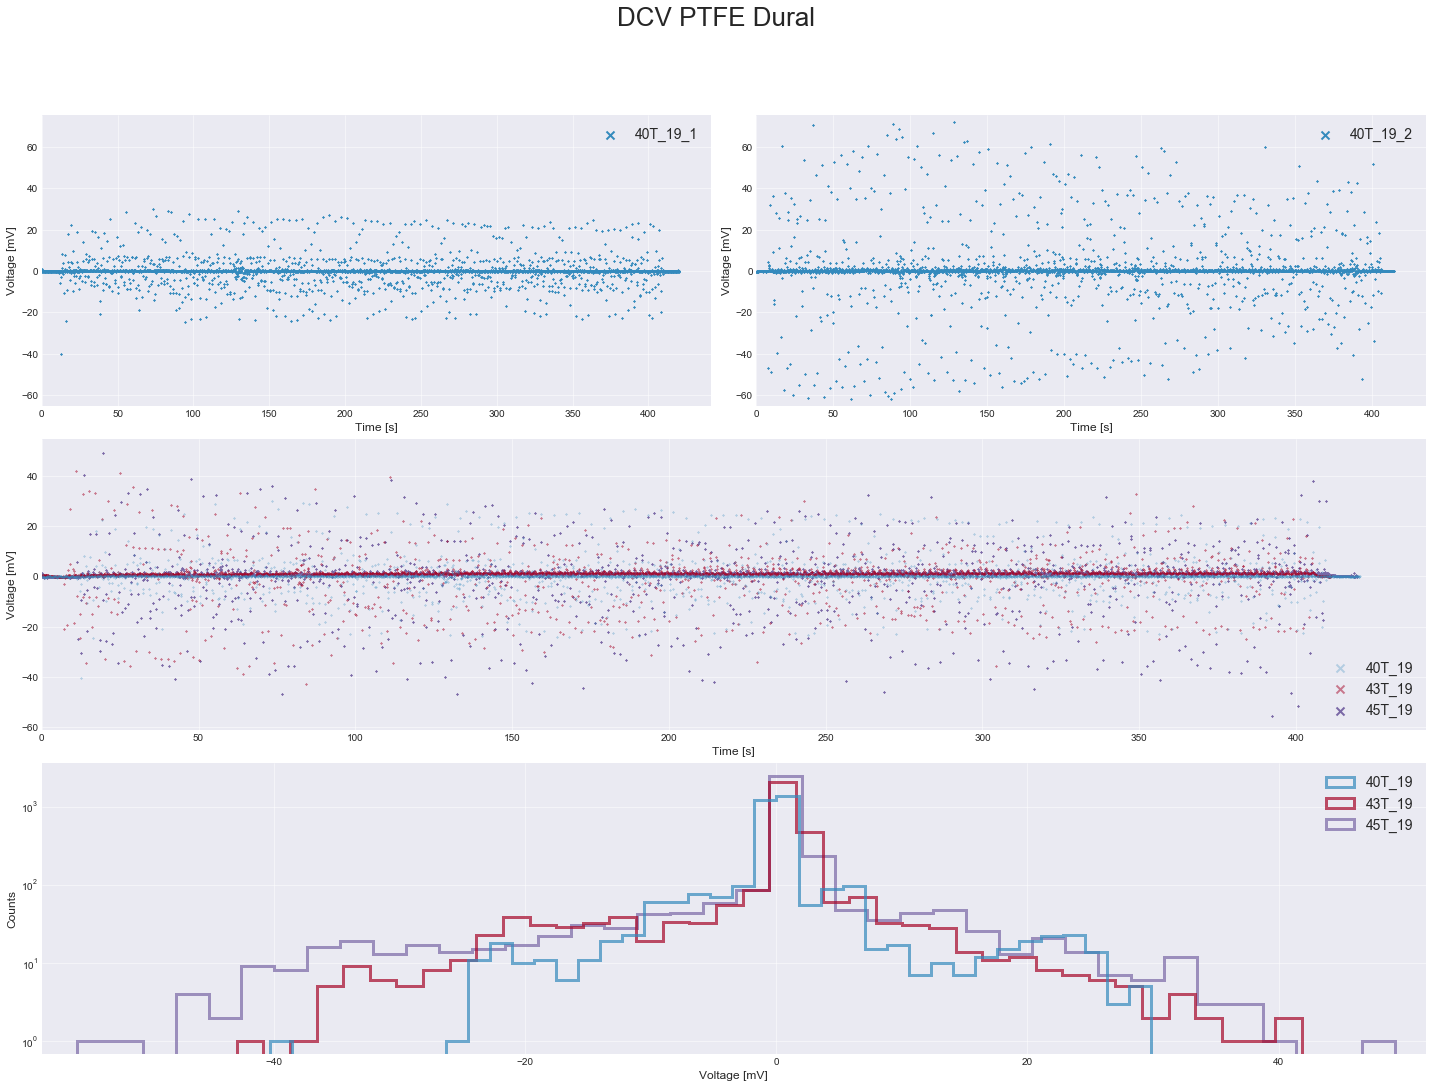

In [433]:
import numpy as np
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn-darkgrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 2)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('DCV PTFE Dural', fontsize=26)


min_y=min(min(df_40T['Voltage']), min(df_40T2['Voltage']))*1.05
max_y=max(max(df_40T['Voltage']), max(df_40T2['Voltage']))*1.05

def applyPlotStyle(arg):
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.legend(fontsize=14, markerscale=8)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if arg == 1:
        plt.xlim(0, )
        plt.ylim(min_y, max_y)
    else:
        plt.xlim(0, )

ax31 = fig.add_subplot(gs[0,0])
plt.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19_1', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

ax32 = fig.add_subplot(gs[0,1])
plt.scatter(df_40T2['Time'],df_40T2['Voltage'], label='40T_19_2', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)


mask = dict(marker='x', s=1)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19', **mask, alpha=0.3, zorder=3)
ax1.scatter(df_43T['Time'],df_43T['Voltage'], label='43T_19', **mask, alpha=0.5, zorder=2)
ax1.scatter(df_45T['Time'],df_45T['Voltage'], label='45T_19', **mask, alpha=1.0, zorder=1)
applyPlotStyle(2)

kwargs = dict(histtype="step", alpha=0.7,  bins=40, linewidth=3)
min_hist=min(min(df_40T['Voltage']), min(df_43T['Voltage']), min(df_45T['Voltage']))*1.05
max_hist=max(max(df_40T['Voltage']), max(df_43T['Voltage']), max(df_45T['Voltage']))*1.05

ax2 = fig.add_subplot(gs[2,:])
ax2.hist(df_40T['Voltage'], **kwargs, label = '40T_19', zorder=3)
ax2.hist(df_43T['Voltage'], **kwargs, label = '43T_19', zorder=2)
ax2.hist(df_45T['Voltage'], **kwargs, label = '45T_19', zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend(fontsize=14, markerscale=8)

#plt.savefig("PTFE Dural DCV.png", bbox_inches='tight',dpi=600)

# Druk3D Dural DCV

In [428]:
import pandas as pd # primary data structure library

# getting data
def handle_data(data):
    data.drop(['Item' ,'Unnamed: 3'], axis=1,inplace=True)
    data.rename(columns={"Dmm1_Time(s)(1)(1)": "Time", "Dmm1_DcVoltage(1)(1)": "Voltage"},inplace = True)
    data['Voltage']=data['Voltage']*1000

df_40T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_12_36_54.csv",delimiter =';',decimal=",")
handle_data(df_40T)

#df_40T2 = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_11_24_56.csv",delimiter =';',decimal=",")
#handle_data(df_40T2)

#df_40T3 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_37_3.csv",delimiter =';',decimal=",")
#handle_data(df_40T3)

df_43T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_12_49_52.csv",delimiter =';',decimal=",")
handle_data(df_43T)

df_45T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_13_4_13.csv",delimiter =';',decimal=",")
handle_data(df_45T)

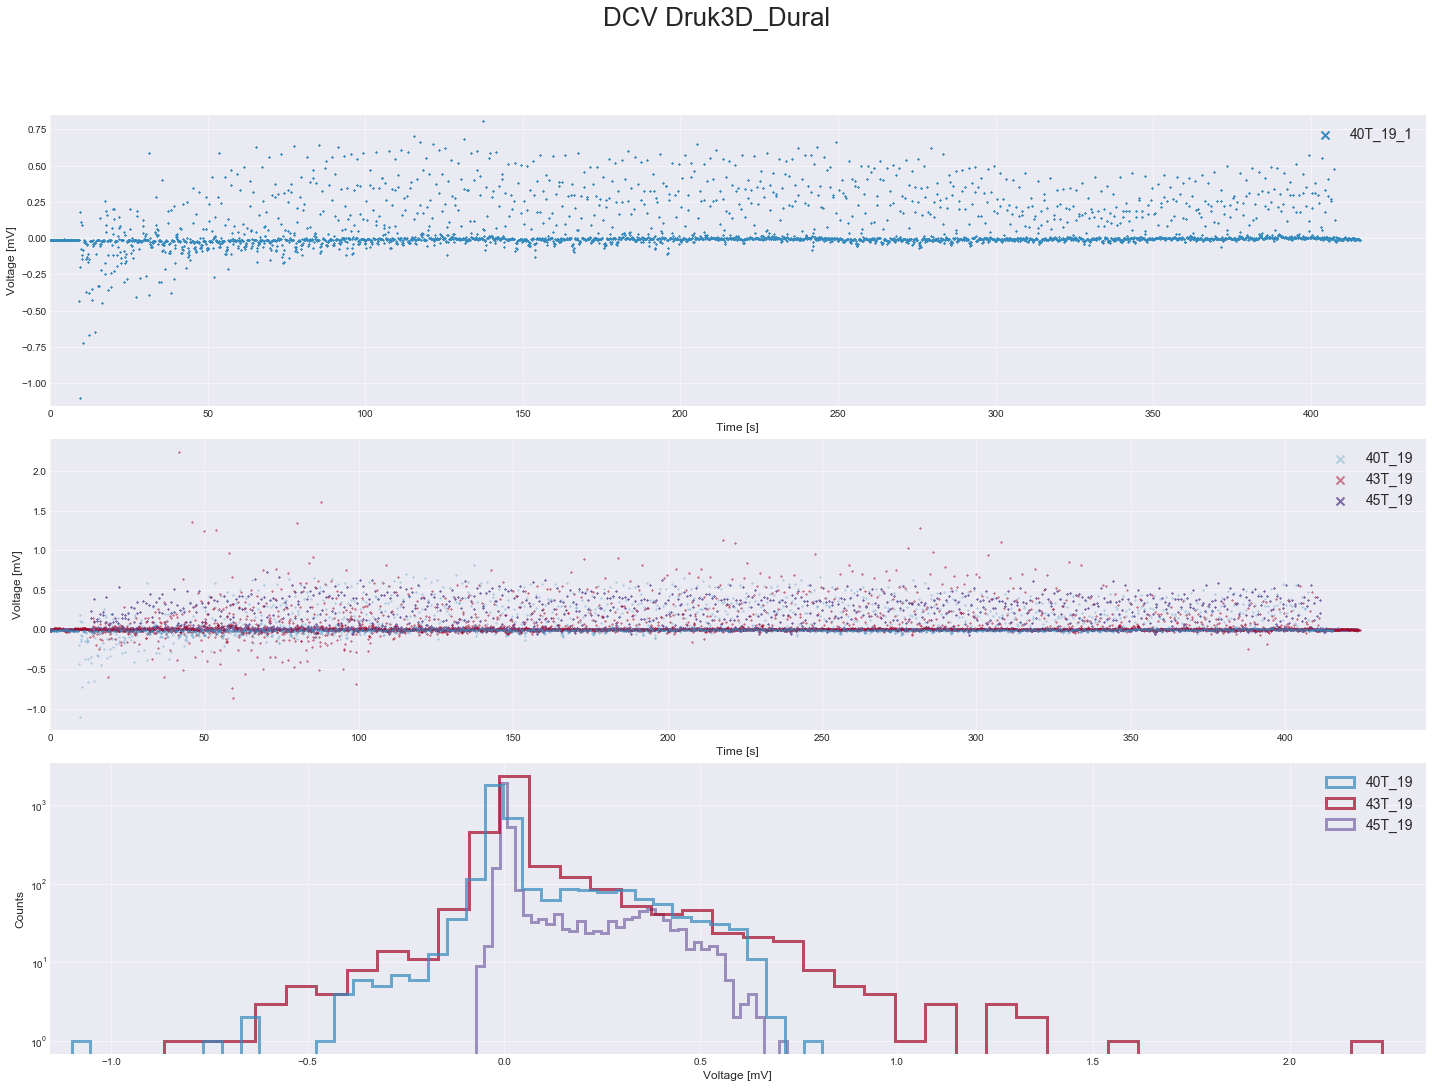

In [429]:
import numpy as np
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn-darkgrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 1)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('DCV Druk3D_Dural', fontsize=26)


min_y=min(df_40T['Voltage'])*1.05
max_y=max(df_40T['Voltage'])*1.05

def applyPlotStyle(arg):
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.legend(fontsize=14, markerscale=8)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if arg == 1:
        plt.xlim(0, )
        plt.ylim(min_y, max_y)
    else:
        plt.xlim(0, )

ax31 = fig.add_subplot(gs[0,0])
plt.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19_1', marker='x', s=1, alpha=1, zorder=1)
applyPlotStyle(1)

#ax32 = fig.add_subplot(gs[0,1])
#plt.scatter(df_40T2['Time'],df_40T2['Voltage'], label='40T_19_2', marker='x', s=1, alpha=1, zorder=1)
#applyPlotStyle(1)


mask = dict(marker='x', s=1)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19', **mask, alpha=0.3, zorder=3)
ax1.scatter(df_43T['Time'],df_43T['Voltage'], label='43T_19', **mask, alpha=0.5, zorder=2)
ax1.scatter(df_45T['Time'],df_45T['Voltage'], label='45T_19', **mask, alpha=1.0, zorder=1)
applyPlotStyle(2)

kwargs = dict(histtype="step", alpha=0.7,  bins=40, linewidth=3)
min_hist=min(min(df_40T['Voltage']), min(df_43T['Voltage']), min(df_45T['Voltage']))*1.05
max_hist=max(max(df_40T['Voltage']), max(df_43T['Voltage']), max(df_45T['Voltage']))*1.05

ax2 = fig.add_subplot(gs[2,:])
ax2.hist(df_40T['Voltage'], **kwargs, label = '40T_19', zorder=3)
ax2.hist(df_43T['Voltage'], **kwargs, label = '43T_19', zorder=2)
ax2.hist(df_45T['Voltage'], **kwargs, label = '45T_19', zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend(fontsize=14, markerscale=8)

#plt.savefig("Druk3D Dural DCV.png", bbox_inches='tight',dpi=600)

# PEEK Cu DCV

In [430]:
import pandas as pd # primary data structure library

# getting data
def handle_data(data):
    data.drop(['Item' ,'Unnamed: 3'], axis=1,inplace=True)
    data.rename(columns={"Dmm1_Time(s)(1)(1)": "Time", "Dmm1_DcVoltage(1)(1)": "Voltage"},inplace = True)
    data['Voltage']=data['Voltage']*1000

#df_40T = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_12_36_54.csv",delimiter =';',decimal=",")
#handle_data(df_40T)

#df_40T2 = pd.read_csv(r"Smarnosc_csv_all/2019_7_17_11_24_56.csv",delimiter =';',decimal=",")
#handle_data(df_40T2)

#df_40T3 = pd.read_csv(r"Smarnosc_csv_all/2019_7_16_13_37_3.csv",delimiter =';',decimal=",")
#handle_data(df_40T3)

df_43T = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_13_45_35.csv",delimiter =';',decimal=",")
handle_data(df_43T)

df_45T = pd.read_csv(r"Smarnosc_csv_all/2019_7_22_14_4_52.csv",delimiter =';',decimal=",")
handle_data(df_45T)

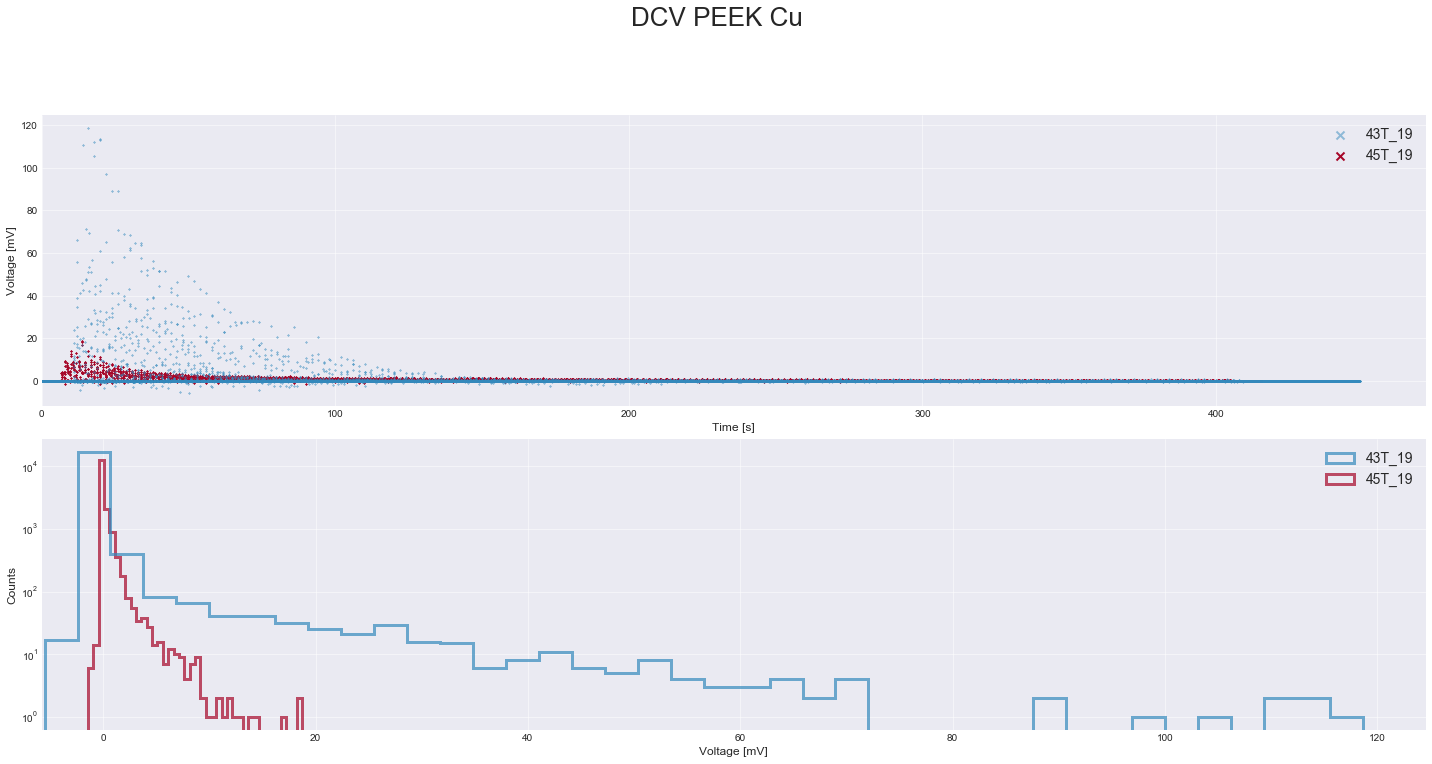

In [431]:
import numpy as np
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn-darkgrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 1)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('DCV PEEK Cu', fontsize=26)


min_y=min(df_40T['Voltage'])*1.05
max_y=max(df_40T['Voltage'])*1.05

def applyPlotStyle(arg):
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.legend(fontsize=14, markerscale=8)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if arg == 1:
        plt.xlim(0, )
        plt.ylim(min_y, max_y)
    else:
        plt.xlim(0, )

#ax31 = fig.add_subplot(gs[0,0])
#plt.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19_1', marker='x', s=1, alpha=1, zorder=1)
#applyPlotStyle(1)

#ax32 = fig.add_subplot(gs[0,1])
#plt.scatter(df_40T2['Time'],df_40T2['Voltage'], label='40T_19_2', marker='x', s=1, alpha=1, zorder=1)
#applyPlotStyle(1)


mask = dict(marker='x', s=1)

ax1 = fig.add_subplot(gs[0,:])
#ax1.scatter(df_40T['Time'],df_40T['Voltage'], label='40T_19', **mask, alpha=0.3, zorder=3)
ax1.scatter(df_43T['Time'],df_43T['Voltage'], label='43T_19', **mask, alpha=0.5, zorder=2)
ax1.scatter(df_45T['Time'],df_45T['Voltage'], label='45T_19', **mask, alpha=1.0, zorder=1)
applyPlotStyle(2)

kwargs = dict(histtype="step", alpha=0.7,  bins=40, linewidth=3)
min_hist=min(df_43T['Voltage'])*1.05
max_hist=max(df_43T['Voltage'])*1.05

ax2 = fig.add_subplot(gs[1,:])
#ax2.hist(df_40T['Voltage'], **kwargs, label = '40T_19', zorder=3)
ax2.hist(df_43T['Voltage'], **kwargs, label = '43T_19', zorder=2)
ax2.hist(df_45T['Voltage'], **kwargs, label = '45T_19', zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend(fontsize=14, markerscale=8)

#plt.savefig("PEEK Cu DCV.png", bbox_inches='tight',dpi=600)

In [184]:
import pandas as pd # primary data structure library

# getting data
df = pd.read_excel(r"Zeszyt1.xlsx",delimiter =';',decimal=",",sheet_name="Arkusz1")
#df.head(8)

In [3]:
# slices data
df=df[::4]
#df.head(8)
#df.shape

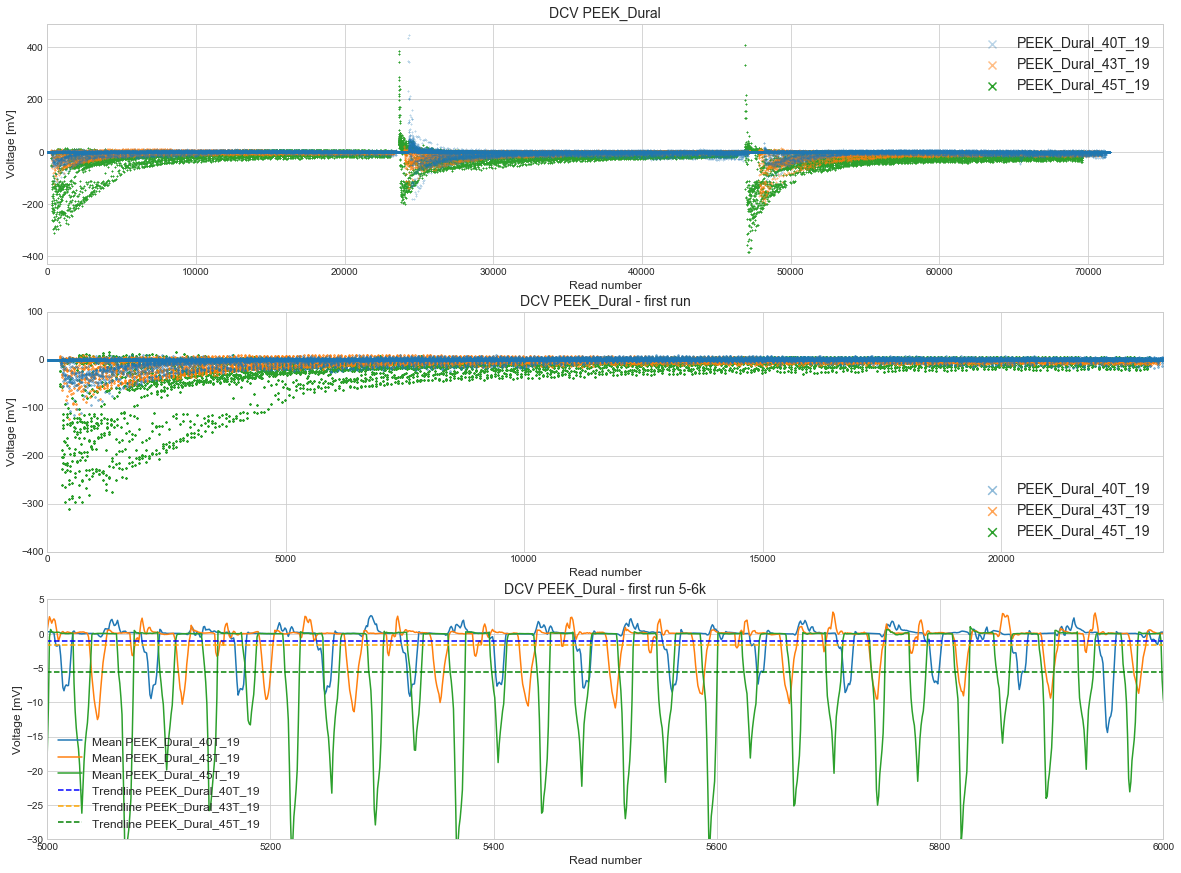

In [7]:
import pandas as pd
import numpy as np
from scipy import stats


from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')
#ax = df.plot(kind='scatter', x='No',y='PEEK_Dural_40T_19',figsize=(20, 15))
No = df['No']
PEEK_Dural_40T_19=df['PEEK_Dural_40T_19']
PEEK_Dural_43T_19=df['PEEK_Dural_40T_19_43T_19']
PEEK_Dural_45T_19=df['PEEK_Dural_40T_19_45T_19']

fig = plt.figure()
gs = gridspec.GridSpec(3, 1)
fig.set_figheight(15)
fig.set_figwidth(20)

ax1 = fig.add_subplot(gs[0,:])
ax1.scatter(No, PEEK_Dural_40T_19, label='PEEK_Dural_40T_19', marker='x', s=1, alpha=0.3, zorder=3)
ax1.scatter(No, PEEK_Dural_43T_19, label='PEEK_Dural_43T_19', marker='x', s=1, alpha=0.5, zorder=2)
ax1.scatter(No, PEEK_Dural_45T_19, label='PEEK_Dural_45T_19', marker='x', s=1, alpha=1, zorder=1)

ax1.set_title('DCV PEEK_Dural',fontsize=14)
ax1.set_ylabel('Voltage [mV]',fontsize=12)
ax1.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=14, markerscale=8)
plt.xlim(0, )

ax2 = fig.add_subplot(gs[1,:])
ax2.scatter(No, PEEK_Dural_40T_19, label='PEEK_Dural_40T_19', marker='x', s=3, alpha=0.5, zorder=3)
ax2.scatter(No, PEEK_Dural_43T_19, label='PEEK_Dural_43T_19', marker='x', s=3, alpha=0.7, zorder=2)
ax2.scatter(No, PEEK_Dural_45T_19, label='PEEK_Dural_45T_19', marker='x', s=3, alpha=1, zorder=1)

ax2.set_title('DCV PEEK_Dural - first run',fontsize=14)
ax2.set_ylabel('Voltage [mV]',fontsize=12)
ax2.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=14, markerscale=5)
plt.xlim(0, 23400)
plt.ylim(-400, 100)

ax3 = fig.add_subplot(gs[2,:])
#ax3.scatter(No, PEEK_Dural_40T_19, label='PEEK_Dural_40T_19', marker='x', s=20, alpha=1, zorder=3)
#ax3.scatter(No, PEEK_Dural_43T_19, label='PEEK_Dural_43T_19', marker='x', s=20, alpha=1, zorder=2)
#ax3.scatter(No, PEEK_Dural_45T_19, label='PEEK_Dural_45T_19', marker='x', s=20, alpha=1, zorder=1)

# Plot the average line
p1=ax3.plot(No,PEEK_Dural_40T_19.rolling(8).mean(), label='Mean PEEK_Dural_40T_19', linestyle='-')
ax3.plot(No,PEEK_Dural_43T_19.rolling(8).mean(), label='Mean PEEK_Dural_43T_19', linestyle='-')
ax3.plot(No,PEEK_Dural_45T_19.rolling(8).mean(), label='Mean PEEK_Dural_45T_19', linestyle='-')


#colour1 = p1.Line2D( color)

# Generated linear fit
data1=PEEK_Dural_40T_19.dropna()
No1 = No.drop(No.tail(No.shape[0]-data1.shape[0]).index)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(No1,data1)
line1 = slope1*No1+intercept1
ax3.plot(No1,line1, label='Trendline PEEK_Dural_40T_19', linestyle='--', color='b')

data1=PEEK_Dural_43T_19.dropna()
No1 = No.drop(No.tail(No.shape[0]-data1.shape[0]).index)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(No1,data1)
line2 = slope2*No1+intercept2
ax3.plot(No1,line2, label='Trendline PEEK_Dural_43T_19', linestyle='--', color='orange')

data2=PEEK_Dural_45T_19.dropna()
No2 = No.drop(No.tail(No.shape[0]-data2.shape[0]).index)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(No2,data2)
line3 = slope3*No2+intercept3
ax3.plot(No2,line3, label='Trendline PEEK_Dural_45T_19', linestyle='--', color='g')

ax3.set_title('DCV PEEK_Dural - first run 5-6k',fontsize=14)
ax3.set_ylabel('Voltage [mV]',fontsize=12)
ax3.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=12, markerscale=2)
plt.xlim(5000, 6000)
plt.ylim(-30, 5)

plt.savefig("PEEK_Dural.png", bbox_inches='tight',dpi=600)

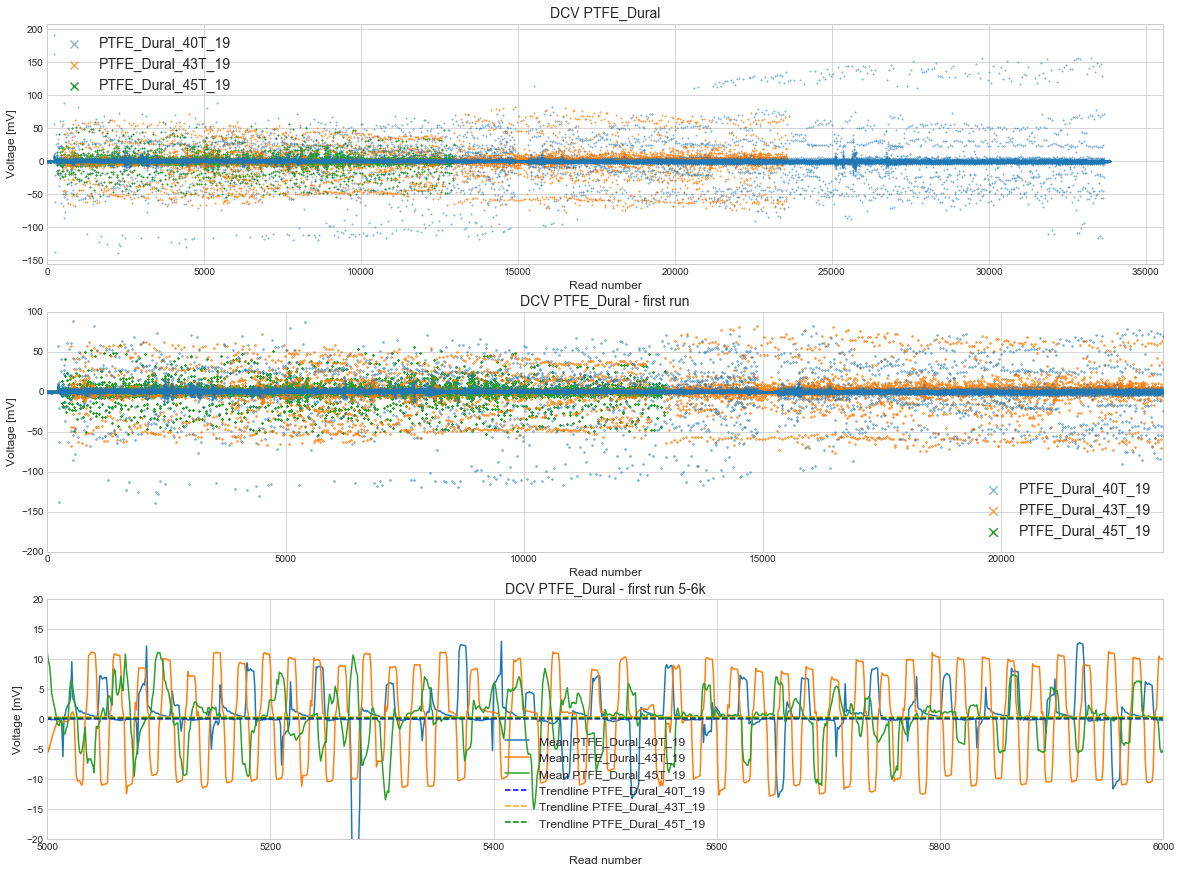

In [8]:
import numpy as np
%matplotlib inline

from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
#ax = df.plot(kind='scatter', x='No',y='PEEK_Dural_40T_19',figsize=(20, 15))
No = df['No']
PTFE_Dural_40T_19=df['PTFE_Dural_40T_19']
PTFE_Dural_43T_19=df['PTFE_Dural_40T_19_43T_19']
PTFE_Dural_45T_19=df['PTFE_Dural_40T_19_45T_19']

fig = plt.figure()
gs = gridspec.GridSpec(3, 1)
fig.set_figheight(15)
fig.set_figwidth(20)

ax1 = fig.add_subplot(gs[0,:])
ax1.scatter(No, PTFE_Dural_40T_19, label='PTFE_Dural_40T_19', marker='x', s=1, alpha=0.5, zorder=3)
ax1.scatter(No, PTFE_Dural_43T_19, label='PTFE_Dural_43T_19', marker='x', s=1, alpha=0.7, zorder=2)
ax1.scatter(No, PTFE_Dural_45T_19, label='PTFE_Dural_45T_19', marker='x', s=1, alpha=1, zorder=1)

ax1.set_title('DCV PTFE_Dural',fontsize=14)
ax1.set_ylabel('Voltage [mV]',fontsize=12)
ax1.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=14, markerscale=8)
plt.xlim(0, )

ax2 = fig.add_subplot(gs[1,:])
ax2.scatter(No, PTFE_Dural_40T_19, label='PTFE_Dural_40T_19', marker='x', s=3, alpha=0.5, zorder=3)
ax2.scatter(No, PTFE_Dural_43T_19, label='PTFE_Dural_43T_19', marker='x', s=3, alpha=0.7, zorder=2)
ax2.scatter(No, PTFE_Dural_45T_19, label='PTFE_Dural_45T_19', marker='x', s=3, alpha=1, zorder=1)

ax2.set_title('DCV PTFE_Dural - first run',fontsize=14)
ax2.set_ylabel('Voltage [mV]',fontsize=12)
ax2.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=14, markerscale=5)
plt.xlim(0, 23400)
plt.ylim(-200, 100)

ax3 = fig.add_subplot(gs[2,:])
#ax3.scatter(No, PTFE_Dural_40T_19, label='PTFE_Dural_40T_19', marker='x', s=20, alpha=0.7, zorder=3)
#ax3.scatter(No, PTFE_Dural_43T_19, label='PTFE_Dural_43T_19', marker='x', s=20, alpha=1, zorder=2)
#ax3.scatter(No, PTFE_Dural_45T_19, label='PTFE_Dural_45T_19', marker='x', s=20, alpha=1, zorder=1)

# Plot the average line
ax3.plot(No,PTFE_Dural_40T_19.rolling(8).mean(), label='Mean PTFE_Dural_40T_19', linestyle='-')
ax3.plot(No,PTFE_Dural_43T_19.rolling(8).mean(), label='Mean PTFE_Dural_43T_19', linestyle='-')
ax3.plot(No,PTFE_Dural_45T_19.rolling(8).mean(), label='Mean PTFE_Dural_45T_19', linestyle='-')

# Generated linear fit
data1=PTFE_Dural_40T_19.dropna()
No1 = No.drop(No.tail(No.shape[0]-data1.shape[0]).index)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(No1,data1)
line1 = slope1*No1+intercept1
ax3.plot(No1,line1, label='Trendline PTFE_Dural_40T_19', linestyle='--', color='b')

data2=PTFE_Dural_43T_19.dropna()
No2 = No.drop(No.tail(No.shape[0]-data2.shape[0]).index)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(No2,data2)
line2 = slope2*No2+intercept2
ax3.plot(No2,line2, label='Trendline PTFE_Dural_43T_19', linestyle='--', color='orange')

data3=PTFE_Dural_45T_19.dropna()
No3 = No.drop(No.tail(No.shape[0]-data3.shape[0]).index)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(No3,data3)
line3 = slope3*No3+intercept3
ax3.plot(No3,line3, label='Trendline PTFE_Dural_45T_19', linestyle='--', color='g')

ax3.set_title('DCV PTFE_Dural - first run 5-6k',fontsize=14)
ax3.set_ylabel('Voltage [mV]',fontsize=12)
ax3.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=12, markerscale=2)
plt.xlim(5000, 6000)
plt.ylim(-20, 20)

plt.savefig("PTFE_Dural.png", bbox_inches='tight',dpi=600)

In [43]:
import pandas as pd
#import numpy as np
#from scipy import stats
df = pd.read_excel(r"Zeszyt1.xlsx",delimiter =';',decimal=",",sheet_name="Arkusz1")
#df=df[::64]
#from matplotlib import gridspec
#import matplotlib as mpl
#import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="pastel")
#df1=df.dropna()
df1=df.drop(['No'], axis=1).dropna()
df1.rename(columns={"PEEK_Dural_40T_19_43T_19": "PEEK_Dural_43T_19", "PEEK_Dural_40T_19_45T_19": "PEEK_Dural_45T_19"},inplace = True)
df1.rename(columns={"PTFE_Dural_40T_19_43T_19": "PTFE_Dural_43T_19", "PTFE_Dural_40T_19_45T_19": "PTFE_Dural_45T_19"},inplace = True)
df1.tail()   

,PEEK_Dural_40T_19,PEEK_Dural_43T_19,PEEK_Dural_45T_19,PTFE_Dural_40T_19,PTFE_Dural_43T_19,PTFE_Dural_45T_19
13287,-0.025728,0.034604,0.031191,0.926106,-0.327573,-0.305956
13288,0.021525,0.055129,0.065662,1.211671,-0.722970,0.583857
13289,0.056845,0.021069,0.047616,0.683717,-0.035273,-0.297544
13290,0.079338,-0.001109,0.021490,0.805446,3.021899,0.202736
13291,0.043568,0.025136,-0.017366,1.172559,16.677831,0.372995


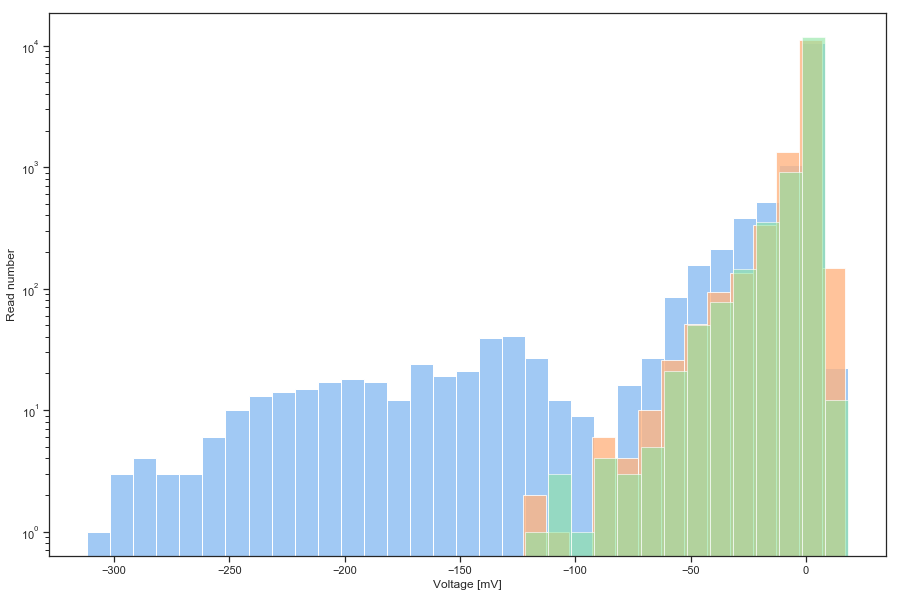

In [106]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
bins_array=np.arange(min(df1['PEEK_Dural_45T_19']), max(df1['PEEK_Dural_45T_19']) + 10, 10)
plt.hist(df1['PEEK_Dural_45T_19'], alpha=1.0, bins=bins_array)
plt.hist(df1['PEEK_Dural_43T_19'], alpha=0.8, bins=np.arange(min(df1['PEEK_Dural_43T_19']), max(df1['PEEK_Dural_43T_19']) + 10, 10))
plt.hist(df1['PEEK_Dural_40T_19'], alpha=0.6, bins=np.arange(min(df1['PEEK_Dural_45T_19']), max(df1['PEEK_Dural_45T_19']) + 10, 10))

#ax.grid(True)
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


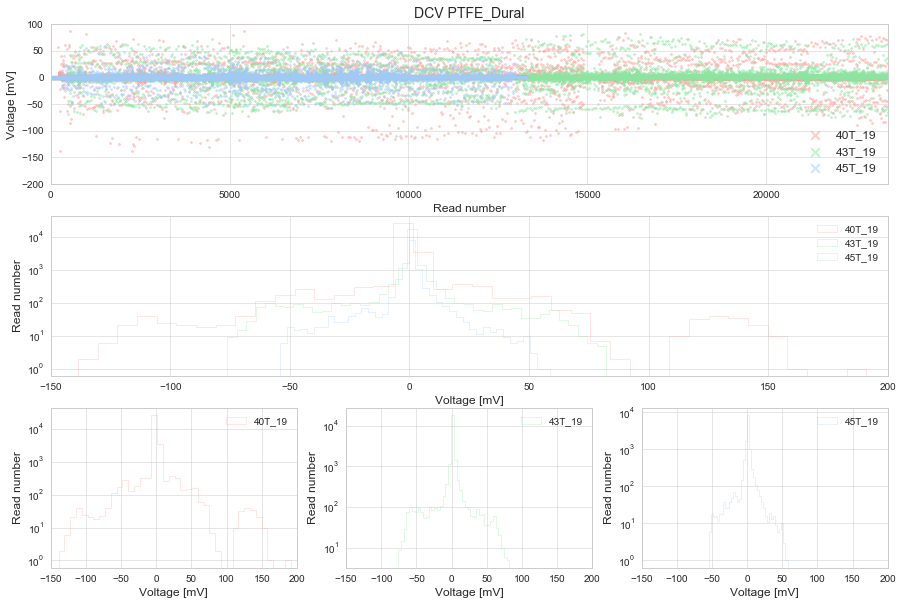

In [170]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
fig.set_figheight(10)
fig.set_figwidth(15)


kwargs = dict(histtype='step', alpha=0.5,  bins=40)

No = df['No']
df_40T_19=df['PTFE_Dural_40T_19']
df_43T_19=df['PTFE_Dural_40T_19_43T_19']
df_45T_19=df['PTFE_Dural_40T_19_45T_19']

ax0 = fig.add_subplot(gs[0,:])

#ax0.scatter(No, df_40T_19, label='40T_19', marker='x', s=3, alpha=0.5, zorder=3, color="r")
#ax0.scatter(No, df_43T_19, label='43T_19', marker='x', s=3, alpha=0.7, zorder=2, color="g")
#ax0.scatter(No, df_45T_19, label='45T_19', marker='x', s=3, alpha=1, zorder=1, color="b")
ax0.scatter(No, df_40T_19, label='40T_19', marker='x', s=3, alpha=0.5, color="r")
ax0.scatter(No, df_43T_19, label='43T_19', marker='x', s=3, alpha=0.5, color="g")
ax0.scatter(No, df_45T_19, label='45T_19', marker='x', s=3, alpha=0.5, color="b")

ax0.set_title('DCV PTFE_Dural',fontsize=14)
ax0.set_ylabel('Voltage [mV]',fontsize=12)
ax0.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=12, markerscale=5)
plt.xlim(0, 23400)
plt.ylim(-200, 100)


min_hist=-150
max_hist=200

ax1 = fig.add_subplot(gs[1,:])
plt.hist(df_40T_19, **kwargs, label = '40T_19', color="r")
plt.hist(df_43T_19, **kwargs, label = '43T_19', color="g")
plt.hist(df_45T_19, **kwargs, label = '45T_19', color="b")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)

plt.legend()
plt.xlim(min_hist, max_hist)

ax2 = fig.add_subplot(gs[2,0])
plt.hist(df_40T_19, **kwargs, label = '40T_19', color="r")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()

ax3 = fig.add_subplot(gs[2,1])
plt.hist(df_43T_19, **kwargs, label = '43T_19', color="g")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()


ax4 = fig.add_subplot(gs[2,2])
plt.hist(df_45T_19, **kwargs, label = '45T_19', color="b")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()

plt.show()

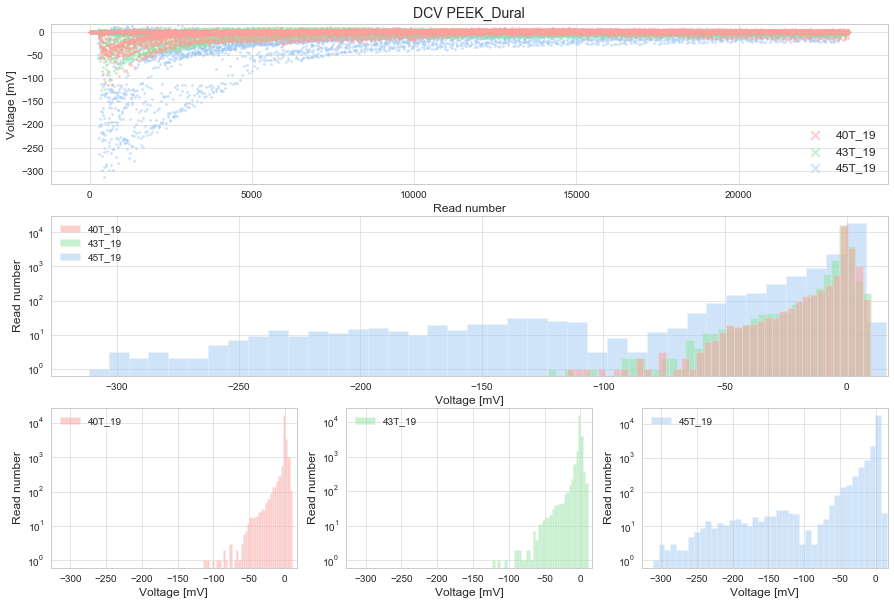

In [182]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline



fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
fig.set_figheight(10)
fig.set_figwidth(15)


kwargs = dict(histtype='bar', alpha=0.5,  bins=40)

df1=df[:23400]
No = df1['No']
df_40T_19=df1['PEEK_Dural_40T_19']
df_43T_19=df1['PEEK_Dural_40T_19_43T_19']
df_45T_19=df1['PEEK_Dural_40T_19_45T_19']

min_hist=min(min(df_40T_19), min(df_43T_19), min(df_45T_19))*1.05
max_hist=max(max(df_40T_19), max(df_43T_19), max(df_45T_19))*1.05

ax0 = fig.add_subplot(gs[0,:])
plt.style.use('seaborn-whitegrid')
ax0.scatter(No, df_40T_19, label='40T_19', marker='x', s=3, alpha=0.5, color="r", zorder=3)
ax0.scatter(No, df_43T_19, label='43T_19', marker='x', s=3, alpha=0.5, color="g", zorder=2)
ax0.scatter(No, df_45T_19, label='45T_19', marker='x', s=3, alpha=0.5, color="b", zorder=1)

ax0.set_title('DCV PEEK_Dural',fontsize=14)
ax0.set_ylabel('Voltage [mV]',fontsize=12)
ax0.set_xlabel('Read number',fontsize=12)
plt.legend(fontsize=12, markerscale=5)
plt.ylim(min_hist, max_hist)

ax1 = fig.add_subplot(gs[1,:])
plt.hist(df_40T_19, **kwargs, label = '40T_19', color="r", zorder=3)
plt.hist(df_43T_19, **kwargs, label = '43T_19', color="g", zorder=2)
plt.hist(df_45T_19, **kwargs, label = '45T_19', color="b", zorder=1)
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.legend()
plt.xlim(min_hist, max_hist)

ax2 = fig.add_subplot(gs[2,0])
plt.hist(df_40T_19, **kwargs, label = '40T_19', color="r")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()

ax3 = fig.add_subplot(gs[2,1])
plt.hist(df_43T_19, **kwargs, label = '43T_19', color="g")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()


ax4 = fig.add_subplot(gs[2,2])
plt.hist(df_45T_19, **kwargs, label = '45T_19', color="b")
plt.yscale('log', nonposy='clip')
plt.ylabel('Read number',fontsize=12)
plt.xlabel('Voltage [mV]',fontsize=12)
plt.xlim(min_hist, max_hist)
plt.legend()

plt.show()